## Think Stats2

### Chapter 3

#### Pmf

In [1]:
from __future__ import print_function

import math
import numpy as np

In [2]:
import thinkstats2

In [3]:
pmf = thinkstats2.Pmf([1,2,2,3,5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

In [4]:
hist = thinkstats2.Hist([1,2,3,3,5])
hist

Hist({1: 1, 2: 1, 3: 2, 5: 1})

In [5]:
pmf.Prob(2)

0.4

In [6]:
pmf.Prob(4)

0

In [7]:
hist.Freq(2)

1

In [8]:
pmf[3]

0.2

In [9]:
pmf.Incr(2,0.2)
pmf.Prob(2)

0.6000000000000001

In [10]:
pmf.Mult(2,0.5)
pmf.Prob(2)

0.30000000000000004

In [11]:
pmf.Total()

0.8999999999999999

In [12]:
pmf.Normalize()
pmf.Total

<bound method _DictWrapper.Total of Pmf({1: 0.22222222222222224, 2: 0.33333333333333337, 3: 0.22222222222222224, 5: 0.22222222222222224})>

#### PMFをプロット

In [13]:
import thinkplot

In [14]:
import first
import nsfg

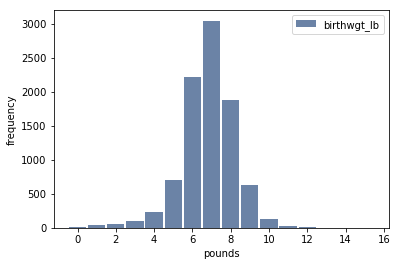

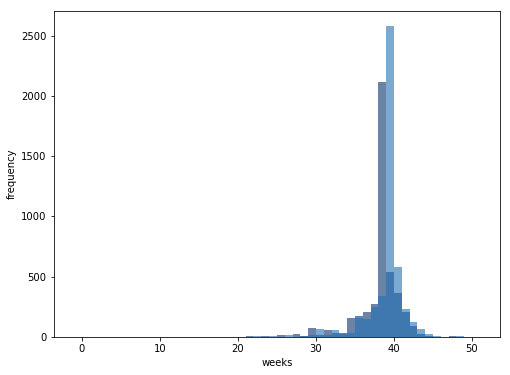

In [15]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
hist = thinkstats2.Hist(live.birthwgt_lb,label="birthwgt_lb")
thinkplot.Hist(hist)
thinkplot.Show(xlabel="pounds",ylabel="frequency")
firsts = live[live.birthord ==1 ]
others = live[live.birthord !=1 ]
#Dateframeの作成
firsts_hist = thinkstats2.Hist(firsts.prglngth)
others_hist = thinkstats2.Hist(others.prglngth)
#think.plotのオブジェクト作成
width = 1.0
thinkplot.PrePlot(5)
thinkplot.Hist(firsts_hist,align="right",width =width)
thinkplot.Hist(others_hist,align="left",width =width)
thinkplot.Show(xlabel ="weeks",ylabel ="frequency")

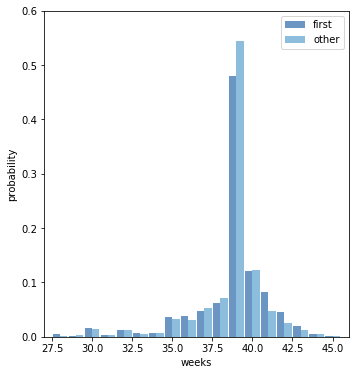

In [16]:
    first_pmf = thinkstats2.Pmf(firsts.prglngth, label='first')
    other_pmf = thinkstats2.Pmf(others.prglngth, label='other')
    width = 0.45

    thinkplot.PrePlot(2, cols=2)
    thinkplot.Hist(first_pmf, align='right', width=width)
    thinkplot.Hist(other_pmf, align='left', width=width)
    thinkplot.Config(xlabel='weeks',
                     ylabel='probability',
                     axis=[27, 46, 0, 0.6])
    thinkplot.Show()

Writing probability_nsfg_pmf.pdf
Writing probability_nsfg_pmf.eps


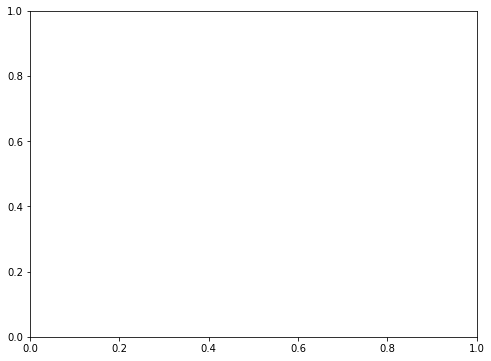

In [17]:
    thinkplot.PrePlot(2)
    thinkplot.SubPlot(2)
    thinkplot.Pmfs([first_pmf, other_pmf])
    thinkplot.Save(root='probability_nsfg_pmf',
                   xlabel='weeks',
                   axis=[27, 46, 0, 0.6])
    thinkplot.Show()

#### その他の可視化


In [18]:
    # plot the differences in the PMFs
    weeks = range(35, 46)
    diffs = []
    for week in weeks:
        p1 = first_pmf.Prob(week)
        p2 = other_pmf.Prob(week)
        diff = 100 * (p1 - p2)
        diffs.append(diff)

    thinkplot.Bar(weeks, diffs)
    thinkplot.Save(root='probability_nsfg_diffs',
                   title='Difference in PMFs',
                   xlabel='weeks',
                   ylabel='percentage points',
                   legend=False)

Writing probability_nsfg_diffs.pdf
Writing probability_nsfg_diffs.eps


#### クラスサイズのパラドックス

In [19]:
d = {7:8,12:8,17:14,22:4,27:6,32:12,37:8,42:3,47:2}
pmf = thinkstats2.Pmf(d,label="actual")
print("mean",pmf.Mean())

mean 23.692307692307693


In [20]:
def BiasPmf(pmf,label):
    new_pmf = pmf.Copy(label=label)
    
    for x,p in pmf.Items():
        new_pmf.Mult(x,x)
        
    new_pmf.Normalize()  #確率にする（総和を1にする）
    return new_pmf

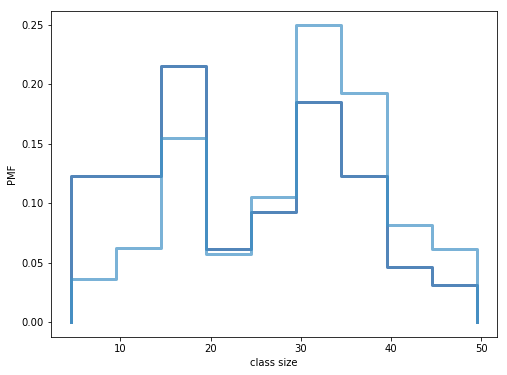

In [21]:
biased_pmf = BiasPmf(pmf,label="observed")
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf,biased_pmf])
thinkplot.Show(xlabel="class size",ylabel="PMF")

In [22]:
def UnbiasPmf(pmf,label):
    new_pmf = pmf.Copy(label=label)
    
    for x,p in pmf.Items():
        new_pmf.Mult(x,1.0/x)
        
    new_pmf.Normalize()
    return new_pmf

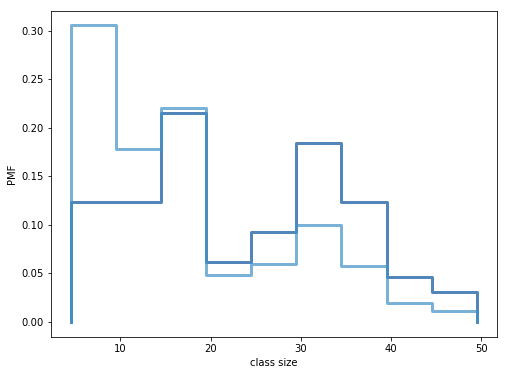

In [23]:
unbiased_pmf = UnbiasPmf(pmf,label="observed")
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf,unbiased_pmf])
thinkplot.Show(xlabel="class size",ylabel="PMF")

#### DataFrameのインデックス処理

In [24]:
import numpy as np
import pandas
array = np.random.randn(4,2)
df = pandas.DataFrame(array)
df

,0,1
0,1.144548,-0.161671
1,-0.695987,0.204726
2,0.472519,1.362337
3,-0.429035,1.510832


In [25]:
columns = ["A","B"]
df = pandas.DataFrame(array, columns=columns)
df

,A,B
0,1.144548,-0.161671
1,-0.695987,0.204726
2,0.472519,1.362337
3,-0.429035,1.510832


In [26]:
index =["a","b","c","d"]
df = pandas.DataFrame(array, columns=columns,index=index)
df

,A,B
a,1.144548,-0.161671
b,-0.695987,0.204726
c,0.472519,1.362337
d,-0.429035,1.510832


In [27]:
df["A"]

a    1.144548
b   -0.695987
c    0.472519
d   -0.429035
Name: A, dtype: float64

In [28]:
df.loc["a"]

A    1.144548
B   -0.161671
Name: a, dtype: float64

In [29]:
df.iloc[0]             #locではなくiloc

A    1.144548
B   -0.161671
Name: a, dtype: float64

In [30]:
indices=["a","c"]
df.loc[indices]

,A,B
a,1.144548,-0.161671
c,0.472519,1.362337


In [31]:
df["a":"c"]

,A,B
a,1.144548,-0.161671
b,-0.695987,0.204726
c,0.472519,1.362337


In [32]:
df[0:2]

,A,B
a,1.144548,-0.161671
b,-0.695987,0.204726


In [33]:
df.iloc[0:1] #実質index0のみ

,A,B
a,1.144548,-0.161671
